In [1]:
import numpy as np
import scipy as sp
import scipy.spatial
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from simplex import simplex
%matplotlib inline

In [2]:
def _in_plane(supports, data):
    assert supports.shape[0]==3
    o, w = simplex._othonormalize(supports)
    return (data-o).dot(w.T)

def scatter_in_plane(supports, data, **kwargs):
    tmp = _in_plane(supports, data)
    plt.scatter(tmp[:,0], tmp[:,1], **kwargs)

pass 1
pass 2
pass 3


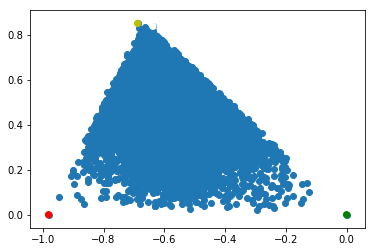

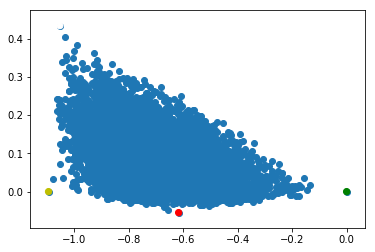

In [3]:
dim = 3
N_pts = 10000
vol = 0
for _ in range(100): # generate vertices of random and non-degenerate simplex
    trial_vertices = np.random.rand(dim+1, dim)
    trial_vol = np.abs(np.linalg.det(trial_vertices[1:,:] - trial_vertices[0, :]))
    if trial_vol > vol:
        vol = trial_vol
        real_vertices = trial_vertices
    
X = np.random.rand(N_pts, dim+1)
X = X / X.sum(axis=1)[:, np.newaxis]
X = X.dot(real_vertices)

X = np.concatenate((X, real_vertices))

vertices, centers = simplex.find_vertices_inner_simplex(X, return_means=True)

scatter_in_plane(real_vertices[0:3, :], X)
scatter_in_plane(real_vertices[0:3, :], real_vertices, c=['r','g','y','w'], s=40)
#scatter_in_plane(real_vertices[0:3, :], centers, c=['r','g','y','w'], marker='d', s=40)
if dim>2:
    plt.figure()
    scatter_in_plane(real_vertices[1:4, :], X)
    scatter_in_plane(real_vertices[1:4, :], real_vertices, c=['r','g','y','w'], s=40)
    #scatter_in_plane(real_vertices[1:4, :], centers,  c=['r','g','y','w'], marker='d', s=40)


triu_indices = np.triu_indices(dim+1, k=1)
ref_d = sp.spatial.distance.squareform(sp.spatial.distance.pdist(real_vertices))
res_d = sp.spatial.distance.squareform(sp.spatial.distance.pdist(vertices))
#print max(np.abs(np.sort(res_d[triu_indices]) - np.sort(ref_d[triu_indices])))
assert np.allclose(sorted(res_d[triu_indices]), sorted(ref_d[triu_indices]))


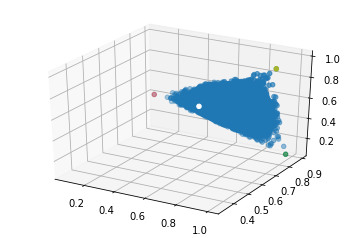

In [4]:
if dim>2:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2])
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],  c=['r','g','y','w'])

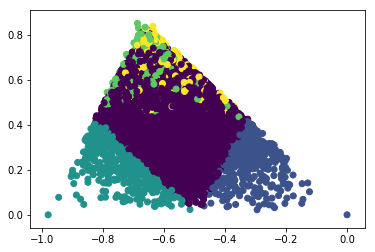

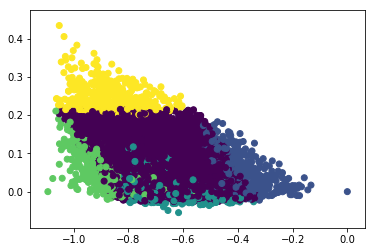

In [5]:
dtraj = simplex.core_assignments([X], vertices, f=0.5)[0]
scatter_in_plane(real_vertices[0:3, :], X, c=dtraj)
if dim > 2:
    plt.figure()
    scatter_in_plane(real_vertices[1:4, :], X, c=dtraj)

In [6]:
d0 = np.linalg.norm(vertices, axis=1)
assert np.all(d0[0] <= d0[1:])
N = vertices.shape[0]
for i in range(1,N):
    assert np.all(abs(vertices[i, i-1]) >= np.abs(vertices[i+1:, i-1]))

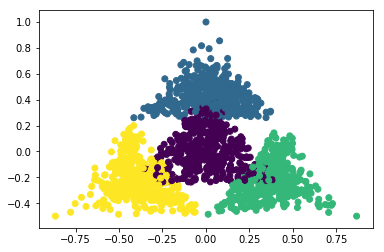

In [7]:
P,o = simplex.splash_corner_projection(vertices)
Y = (X-o).dot(P)
core = (dtraj>=0)
plt.scatter(Y[core, 0], Y[core, 1], c=dtraj[core])
V = (vertices-o).dot(P)
#plt.scatter(V[:, 0], V[:, 1], c='r', s=50)

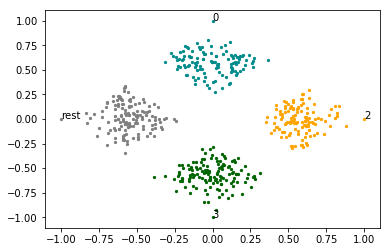

In [8]:
mem = simplex.memberships(X, vertices)
ctrajs = simplex.core_assignment_given_memberships(mem, f=0.6)
simplex.scatter_mem(mem, ctrajs=ctrajs, selection=[0,2,3], center=False)